In [1]:
%matplotlib inline
import nodepy.rooted_trees as rt
import nodepy.runge_kutta_method as rk
import matplotlib.pyplot as plt

## Plot of rooted trees with corresponding (Butcher) order conditions

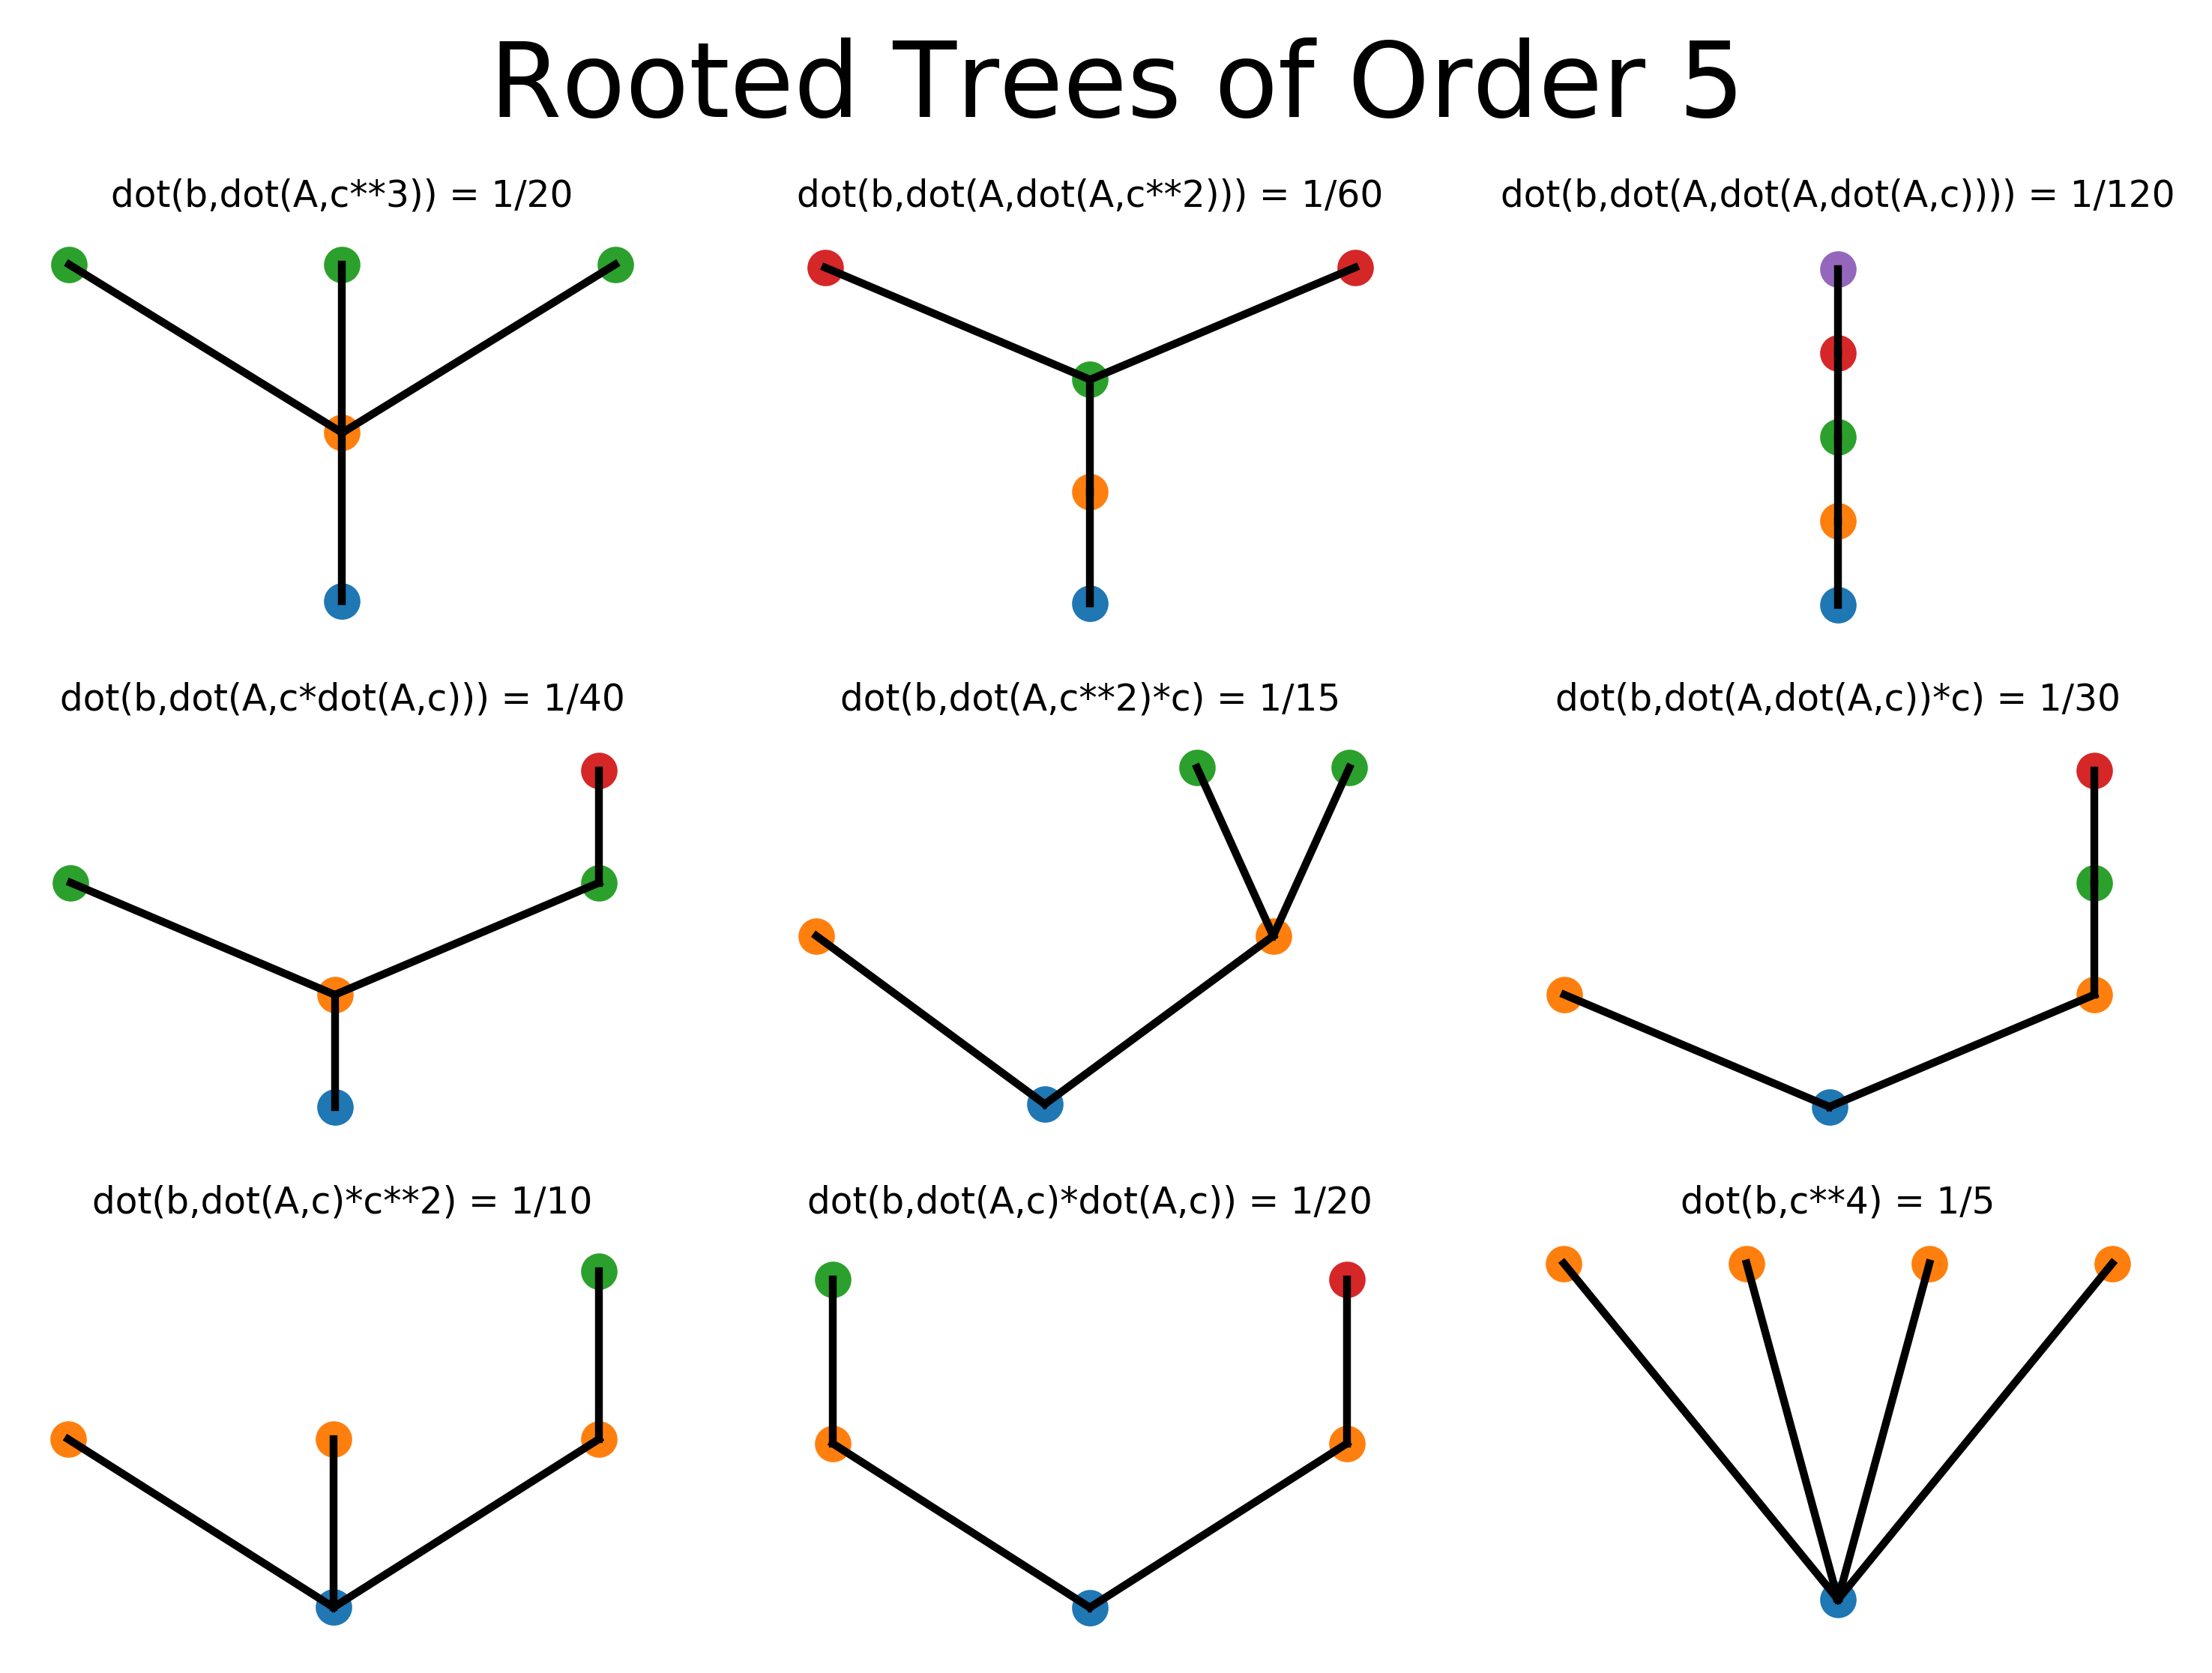

In [2]:
def tree_title(tree):
    return rk.elementary_weight_str(tree)+" = 1/" + str(tree.density())
p = 5
fig = rt.plot_all_trees(5,title=tree_title)
fig.suptitle('Rooted Trees of Order '+str(p),fontsize=20, y=1.08)
plt.setp(fig,dpi=500)
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
plt.draw()

## Generate Python code for order conditions

In [3]:
p = 5
for i in range(1,p+1):
    print("")
    print("Conditions for order "+str(i))
    forest = rt.list_trees(i)
    for tree in forest:
        print(rk.elementary_weight_str(tree)+" = 1/" + str(tree.density()))


Conditions for order 1
dot(b,1) = 1/1

Conditions for order 2
dot(b,c) = 1/2

Conditions for order 3
dot(b,dot(A,c)) = 1/6
dot(b,c**2) = 1/3

Conditions for order 4
dot(b,dot(A,c**2)) = 1/12
dot(b,dot(A,dot(A,c))) = 1/24
dot(b,dot(A,c)*c) = 1/8
dot(b,c**3) = 1/4

Conditions for order 5
dot(b,dot(A,c**3)) = 1/20
dot(b,dot(A,dot(A,c**2))) = 1/60
dot(b,dot(A,dot(A,dot(A,c)))) = 1/120
dot(b,dot(A,c*dot(A,c))) = 1/40
dot(b,dot(A,c**2)*c) = 1/15
dot(b,dot(A,dot(A,c))*c) = 1/30
dot(b,dot(A,c)*c**2) = 1/10
dot(b,dot(A,c)*dot(A,c)) = 1/20
dot(b,c**4) = 1/5


Code to evaluate order conditions can be found in `nodepy/oc_butcher.py` and `nodepy/oc_butcher_high_order.py` (the latter goes up to order 14).

## How many order conditions are there for order $p$?
The table below extends Butcher's table 302(I).

In [6]:
p = 14
num_conditions = []
print('Order   # of conditions     cumulative')
print('--------------------------------------')
for i in range(1,p+1):
    forest = rt.recursiveVectors(i)
    num_conditions.append(len(forest)+1)
    print('{:>3} {:>12} {:>16}'.format(i, num_conditions[-1], sum(num_conditions)))

Order   # of conditions     cumulative
--------------------------------------
  1            1                1
  2            1                2
  3            2                4
  4            4                8
  5            9               17
  6           20               37
  7           48               85
  8          115              200
  9          286              486
 10          719             1205
 11         1842             3047
 12         4766             7813
 13        12486            20299
 14        32973            53272


In fact, the sequence in the second column is in the Online Encyclopedia of Integer sequences as sequence [A000081](http://oeis.org/A000081): *Number of unlabeled rooted trees with n nodes*.